# Demographic Filtering

In this notebook we go through the movies_metadata.csv file from the TMDB dataset on Kaggle

We implement the simplest recommendation system, demographic filtering, to rank and suggest movies to users based on the genre.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from movie_rec.src.utility import load_and_clean_movie_metadata

In [2]:
%matplotlib inline

sns.set_style('darkgrid')
sns.set_context('talk')

In [3]:
df_mmd = load_and_clean_movie_metadata()

$$
WR = \left( \frac{v}{v+m} \right)R + \left( \frac{m}{v+m} \right)C
$$

where,
* $v$ is the number of votes for the movie
* $m$ is the minimum votes required to be listed in the chart
* $R$ is the average rating of the movie
* $C$ is the mean vote across the whole report

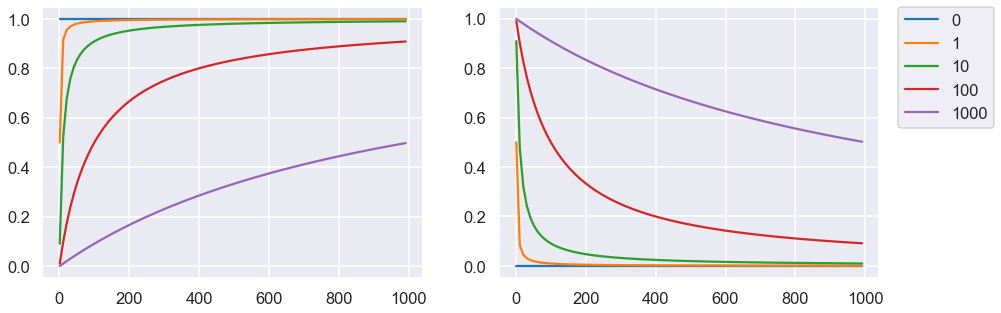

In [4]:
m_pars = [0,1,10,100,1000]
v = np.arange(1,1000,10)
f, axes = plt.subplots(1, 2, figsize=(15,5))
for m in m_pars:
    sns.lineplot(v, v/(v+m), ax=axes[0])
for m in m_pars:
    sns.lineplot(v, m/(v+m), ax=axes[1], label=int(m))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [5]:
def get_rating(df, m_qt):
    m = df.vote_count.quantile(m_qt)
    C = df.vote_count.dot(df.vote_average) / df.vote_count.sum()
    print(f"Value of m = {m} at {m_qt*100} percentile")
    print(f"Rating average C = {C:.3f}")
    v = df.vote_count
    R = df.vote_average
    return (v/(v+m))*R + (m/(v+m))*C

In [6]:
df_mmd['global_rating'] = get_rating(df_mmd, 0.9)
df_mmd.sort_values(by="global_rating", ascending=False)[['title']].head(10)

Value of m = 166.0 at 90.0 percentile
Rating average C = 6.673


,title
5434,Dilwale Dulhania Le Jayenge
20827,The Shawshank Redemption
22299,The Godfather
2013,The Dark Knight
31685,Pulp Fiction
4337,Your Name.
34576,Schindler's List
21247,Whiplash
23696,Spirited Away
22098,Life Is Beautiful


In [7]:
def genre_rating(genre):
    df_genre = df_mmd[df_mmd.genres.map(lambda c: True if genre in c else False)]
    df_mmd[genre+'_rating'] = get_rating(df_genre, 0.9)

In [8]:
def plot_prod_comp_by_genre(rating_col):
    f = plt.figure(figsize=(10,5))
    df_genre = df_mmd.sort_values(by=rating_col, ascending=False).head(100).explode('production_companies')
    g = sns.countplot(x='production_companies', data=df_genre, order=df_genre.production_companies.value_counts().iloc[:10].index)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

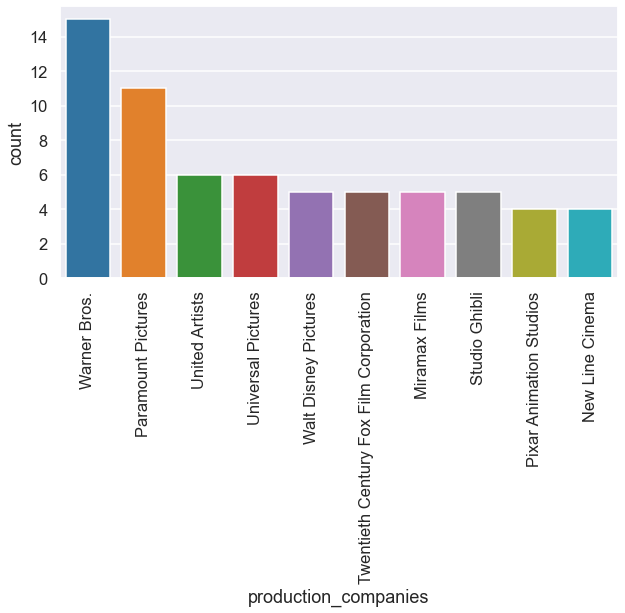

In [9]:
plot_prod_comp_by_genre('global_rating')

In [11]:
def get_genre_metrics(genre):
    genre_rating(genre)
    df_mmd.sort_values(by=genre+"_rating", ascending=False)[['title']].head(10)
    print(df_mmd.sort_values(by=genre+"_rating", ascending=False)[['title']].head(10))
    plot_prod_comp_by_genre(genre+'_rating')

Value of m = 212.0 at 90.0 percentile
Rating average C = 6.479
                             title
5434   Dilwale Dulhania Le Jayenge
22098            Life Is Beautiful
9863                  Forrest Gump
3839              The Intouchables
32916           Back to the Future
34113     The Grand Budapest Hotel
26026      The Wolf of Wall Street
16174                   Inside Out
4760                    La La Land
31083                 Modern Times


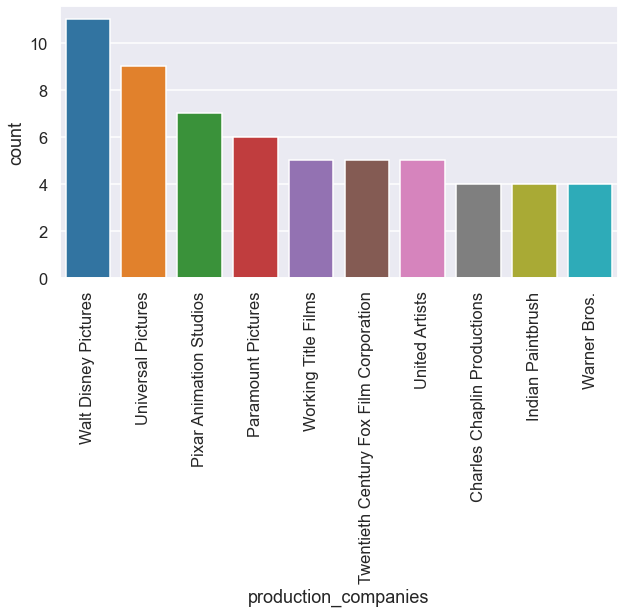

In [13]:
get_genre_metrics('Comedy')